<a href="https://colab.research.google.com/github/navaneethan67/main-projects/blob/main/Main_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the necessary libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.svm import SVC

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, classification_report
from sklearn.metrics import roc_auc_score

sns.set_theme(style="whitegrid")

In [ ]:
# Read from file
df_cancer_breast = pd.read_csv('/content/cancer.csv')
df_cancer_breast

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


#Exploratory Data Analysis

In [ ]:
data = df_cancer_breast.copy(deep = True)

In [ ]:
# droping -unnamed , id column
data.drop(" ", axis = 1, inplace = True)
data.drop("id", axis = 1, inplace = True)

In [ ]:
# maping the diagnosis column (str=binary)
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# number of rows and columns in the dataset
data.shape

(569, 31)

In [ ]:
# getting some information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
# checking for missing value
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
# statistical measures about the data
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# checking the distribution of Target Varibale
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

0 --> Benign

1 --> Malignant

In [ ]:
data.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


#Data Visualization

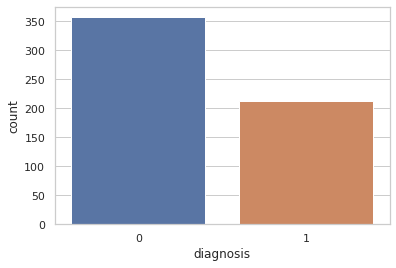

In [ ]:
# countplot for the target column for checkin gthe distribution of target
sns.countplot(x='diagnosis', data=data)

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory.

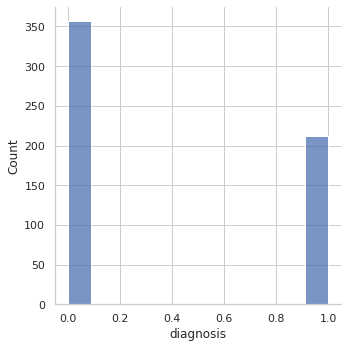

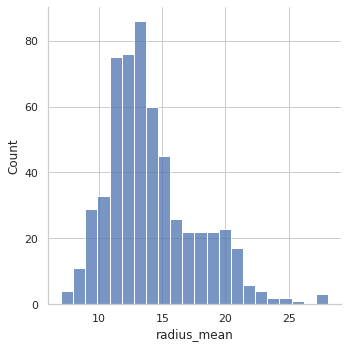

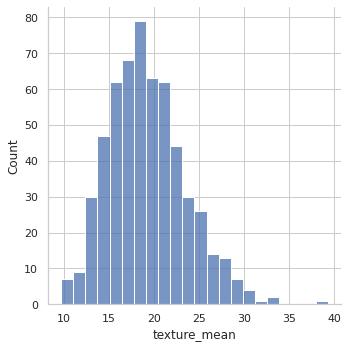

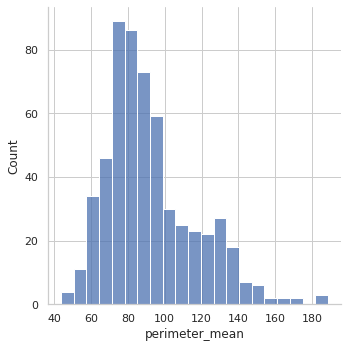

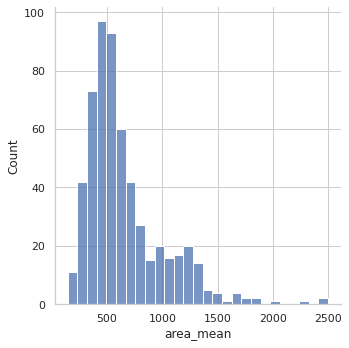

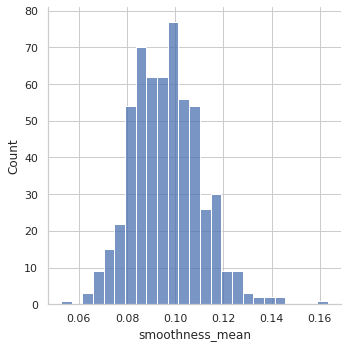

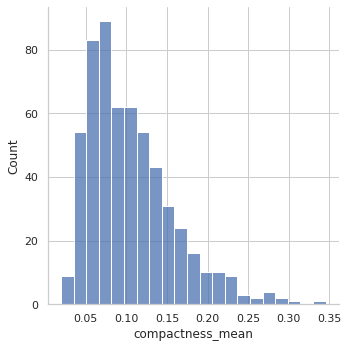

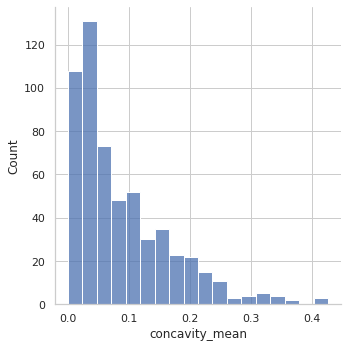

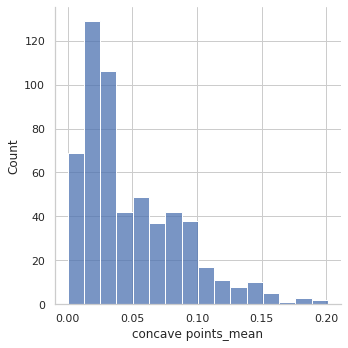

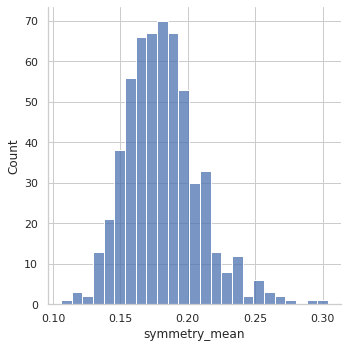

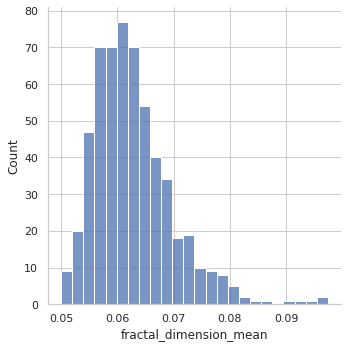

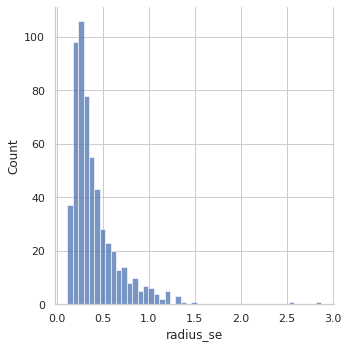

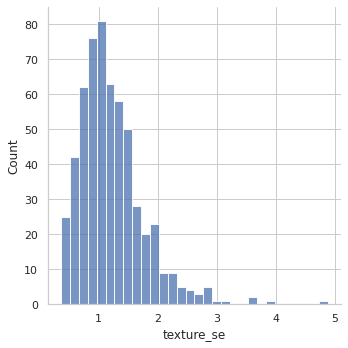

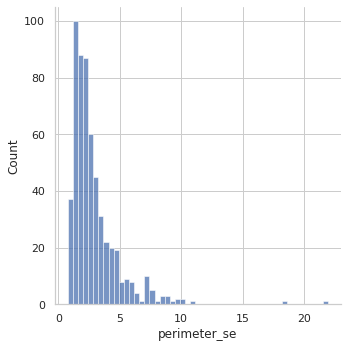

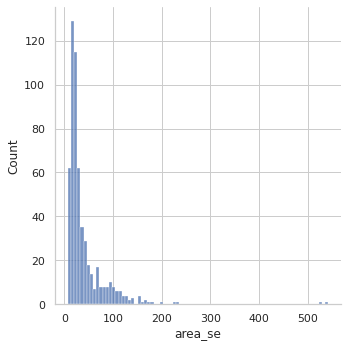

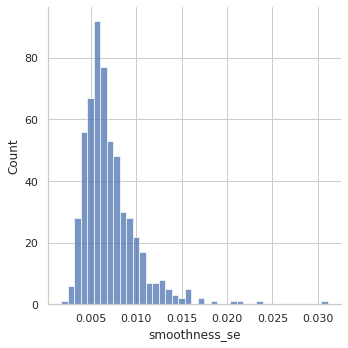

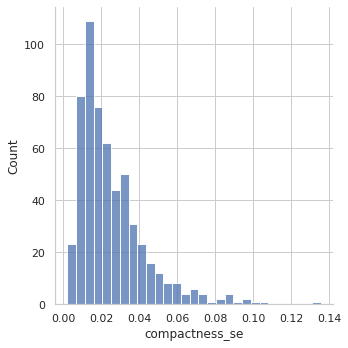

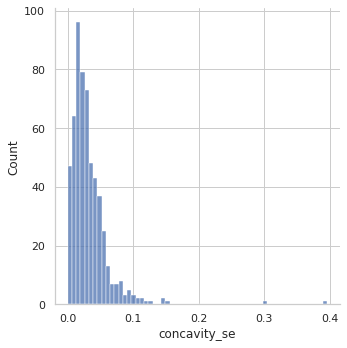

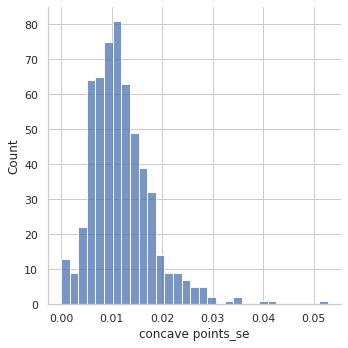

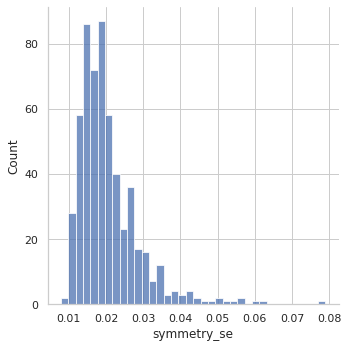

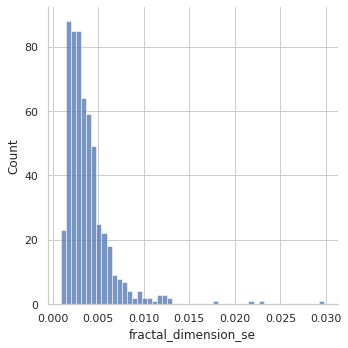

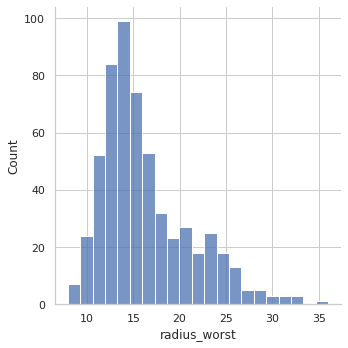

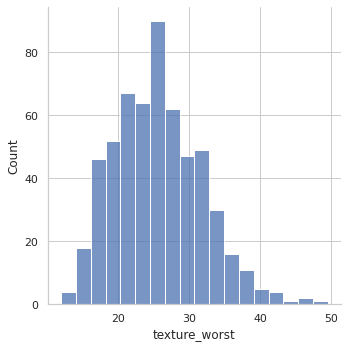

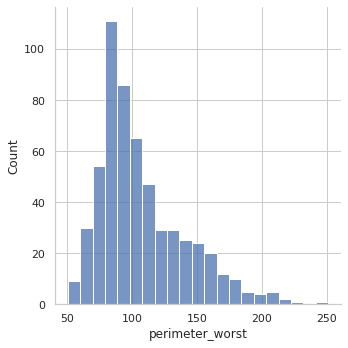

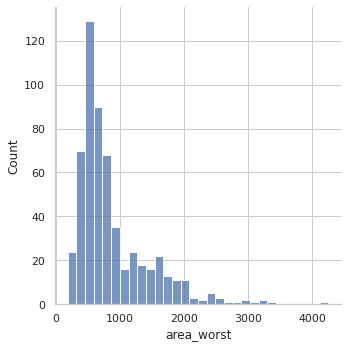

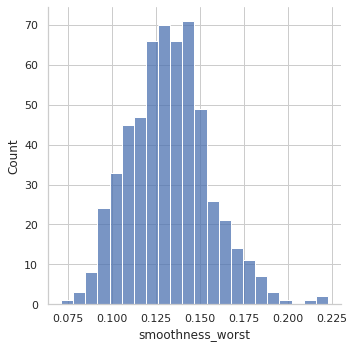

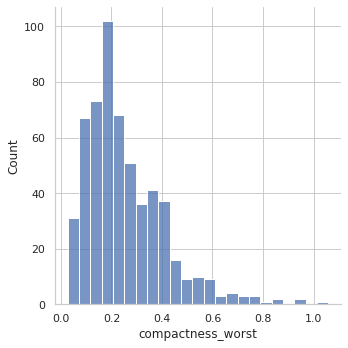

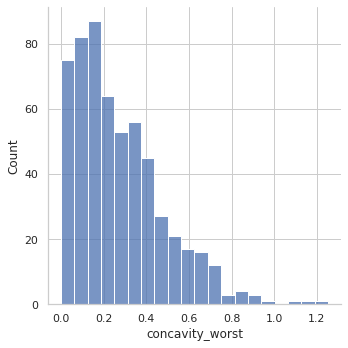

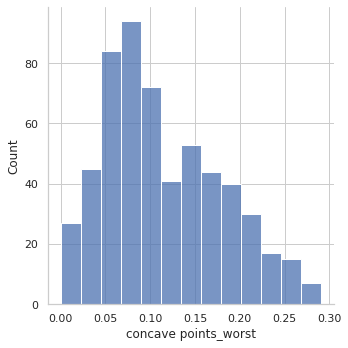

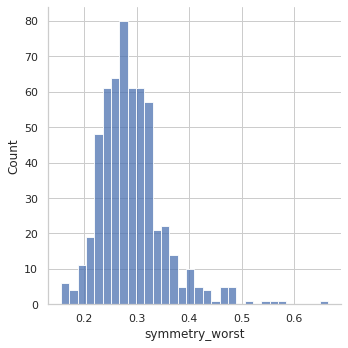

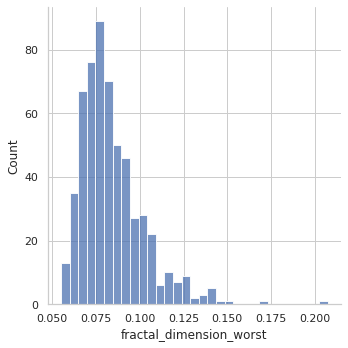

In [ ]:
# creating a distribution plot for all columns
for column in data:
  sns.displot(x=column, data=data)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


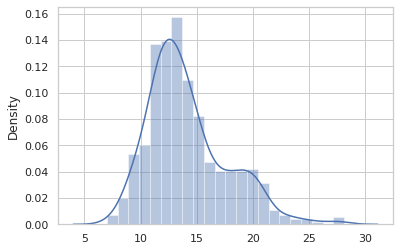

In [ ]:
sns.distplot(x=data.radius_mean)

Inference about distribution: Most of the features are right skewed

Correlation Matrix

In [ ]:
correlation_matrix =data.corr()

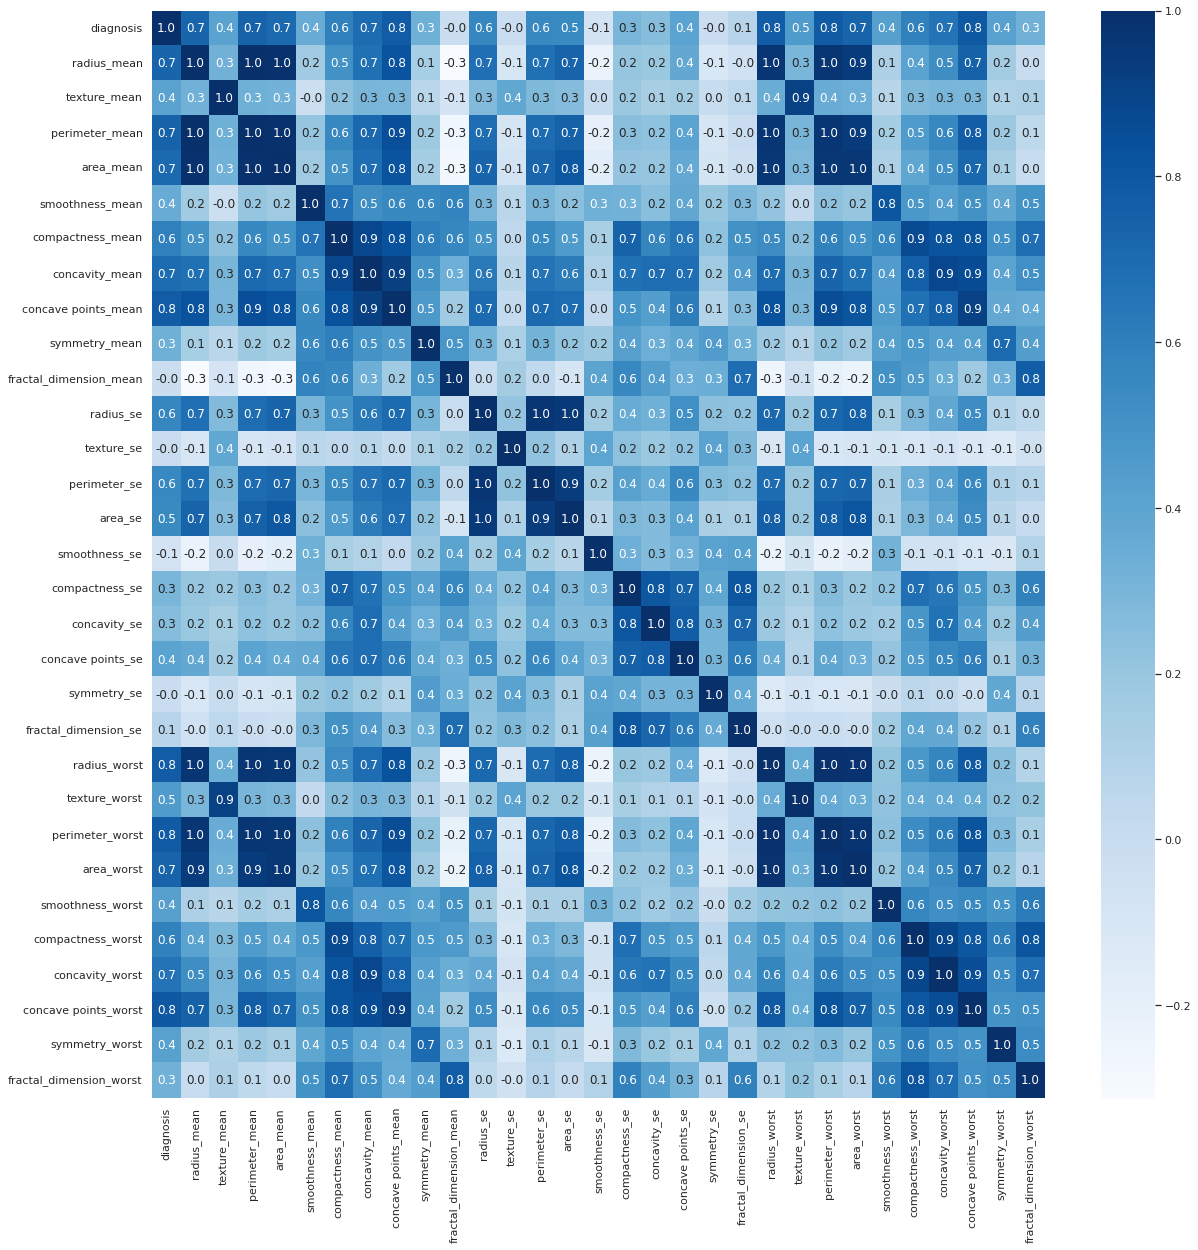

In [ ]:
# constructing a heat map to visualize the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='Blues')

We can remove the features if they have high +ve or -ve correlation between them

#Train Test Split

In [ ]:
data_1= data.copy(deep = True)

In [ ]:
data_1.drop("diagnosis", axis = 1, inplace = True)

In [ ]:
y=data["diagnosis"]
x=data_1.iloc[:,:]

In [ ]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
x.shape,y.shape

((569, 30), (569,))

In [ ]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 10)

# Check the number of records in training and testing dataset.
x_train.shape, y_train.shape, x_test.shape,y_test.shape


((455, 30), (455,), (114, 30), (114,))

#Standardization

In [ ]:
# Initiate scaler
sc = StandardScaler()

# Standardize the training dataset
x_train_transformed = pd.DataFrame(sc.fit_transform(x_train),index=x_train.index, columns=x_train.columns)

# Standardized the testing dataset
x_test_transformed = pd.DataFrame(sc.transform(x_test),index=x_test.index, columns=x_test.columns)

# Summary statistics after standardization
x_train_transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,455.0,-7.808162e-18,1.001101,-2.027500,-0.703153,-0.213224,0.472120,3.870921
texture_mean,455.0,3.142785e-16,1.001101,-2.063794,-0.714685,-0.105486,0.564400,4.681749
perimeter_mean,455.0,-2.108204e-16,1.001101,-1.981706,-0.700629,-0.221717,0.472899,3.869158
area_mean,455.0,7.808162e-17,1.001101,-1.449229,-0.677089,-0.291503,0.358764,5.088109
smoothness_mean,455.0,1.235642e-15,1.001101,-3.161244,-0.717489,-0.013924,0.623671,4.738794
compactness_mean,455.0,1.405469e-16,1.001101,-1.644629,-0.744077,-0.199439,0.460247,3.872028
concavity_mean,455.0,1.483551e-16,1.001101,-1.131380,-0.751350,-0.322083,0.545075,4.202282
concave points_mean,455.0,-1.093143e-16,1.001101,-1.278303,-0.747948,-0.382615,0.666289,3.829759
symmetry_mean,455.0,-4.138326e-16,1.001101,-2.829681,-0.679583,-0.080560,0.542874,4.606464
fractal_dimension_mean,455.0,1.034581e-15,1.001101,-1.842425,-0.675868,-0.153518,0.470736,4.924602


We can see that after using StandardScaler, all the features have zero mean and unit standard deviation.

In [ ]:
# Summary statistics before standardization
x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,455.0,14.243798,3.586088,6.981000,11.725000,13.480000,15.935000,28.11000
texture_mean,455.0,19.221934,4.289026,10.380000,16.160000,18.770000,21.640000,39.28000
perimeter_mean,455.0,92.803736,24.760323,43.790000,75.475000,87.320000,104.500000,188.50000
area_mean,455.0,666.122198,361.017723,143.500000,421.950000,561.000000,795.500000,2501.00000
smoothness_mean,455.0,0.096955,0.014037,0.052630,0.086895,0.096760,0.105700,0.16340
compactness_mean,455.0,0.106437,0.052992,0.019380,0.067050,0.095880,0.130800,0.31140
concavity_mean,455.0,0.090533,0.080108,0.000000,0.030410,0.064760,0.134150,0.42680
concave points_mean,455.0,0.050351,0.039432,0.000000,0.020890,0.035280,0.076595,0.20120
symmetry_mean,455.0,0.181345,0.026656,0.106000,0.163250,0.179200,0.195800,0.30400
fractal_dimension_mean,455.0,0.062887,0.007024,0.049960,0.058145,0.061810,0.066190,0.09744


#Support Vector Machine (SVM) Default Hyperparameters

In [ ]:
# Check default values
svc = SVC()
params = svc.get_params()
params_df = pd.DataFrame(params, index=[0])
params_df.T

,0
C,1.0
break_ties,False
cache_size,200
class_weight,None
coef0,0.0
decision_function_shape,ovr
degree,3
gamma,scale
kernel,rbf
max_iter,-1


We can see that the default hyperparameter has the C value of 1, the gamma value of scale, and the kernel value of rbf.

let's fit the model using the standardized training data and check the accuracy score

In [ ]:
# Run model
svc.fit(x_train_transformed, y_train)

# Accuracy score
print(f'The accuracy score of the model is {svc.score(x_test_transformed, y_test):.4f}')

The accuracy score of the model is 0.9737


#Hyperparameter Tuning Using Grid Search

GridSearchCV is used for determining the best parameters for our model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# loading the SVC model
model = SVC()

In [ ]:
# hyperparameters

parameters = {
              'kernel':['linear','poly','rbf','sigmoid'],
              'C':[1, 5, 10, 20]
}

In [ ]:
# grid search
classifier = GridSearchCV(model, parameters, cv=5)

In [ ]:
# fitting the data to our model
classifier.fit(x, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
classifier.cv_results_

{'mean_fit_time': array([1.43678837, 0.00509725, 0.00685577, 0.01657686, 3.80104938,
        0.00504098, 0.00611053, 0.01622367, 2.88182087, 0.00522161,
        0.00595126, 0.01507316, 4.29436235, 0.00591583, 0.00608325,
        0.01706085]),
 'std_fit_time': array([3.19736917e-01, 5.00768926e-05, 1.71451599e-04, 2.40881246e-04,
        1.18128554e+00, 1.11691366e-04, 2.45751000e-04, 7.30620671e-04,
        5.42139346e-01, 2.13015226e-04, 1.81966370e-04, 1.28667295e-04,
        9.17415713e-01, 4.86800493e-04, 3.65067132e-04, 3.28977227e-03]),
 'mean_score_time': array([0.00273433, 0.00220957, 0.00303736, 0.00524249, 0.00229497,
        0.00209951, 0.00284638, 0.00539961, 0.00254354, 0.00208879,
        0.0027245 , 0.00484142, 0.00236883, 0.00219169, 0.00260234,
        0.00481167]),
 'std_score_time': array([7.37533724e-04, 8.32757019e-05, 8.24373533e-05, 5.83410994e-05,
        2.95309683e-05, 9.03795746e-05, 1.10071287e-04, 7.50716067e-04,
        4.13572350e-04, 4.48290333e-05, 1.03

In [ ]:
# best parameters

best_parameters = classifier.best_params_
print(best_parameters)

{'C': 5, 'kernel': 'linear'}


In [ ]:
# higest accuracy

highest_accuracy = classifier.best_score_
print(highest_accuracy)

0.952585002328831


In [ ]:
# loading the results to pandas dataframe
result = pd.DataFrame(classifier.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.436788,0.319737,0.002734,0.000738,1,linear,"{'C': 1, 'kernel': 'linear'}",0.947368,0.929825,0.973684,0.921053,0.955752,0.945536,0.018689,4
1,0.005097,0.000050,0.002210,0.000083,1,poly,"{'C': 1, 'kernel': 'poly'}",0.842105,0.885965,0.929825,0.947368,0.938053,0.908663,0.039382,12
2,0.006856,0.000171,0.003037,0.000082,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.850877,0.894737,0.929825,0.947368,0.938053,0.912172,0.035444,11
3,0.016577,0.000241,0.005242,0.000058,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.543860,0.456140,0.464912,0.385965,0.451327,0.460441,0.050253,13
4,3.801049,1.181286,0.002295,0.000030,5,linear,"{'C': 5, 'kernel': 'linear'}",0.947368,0.938596,0.973684,0.929825,0.973451,0.952585,0.018008,1


In [ ]:
grid_search_result = result[['param_C','param_kernel','mean_test_score']]
grid_search_result

,param_C,param_kernel,mean_test_score
0,1,linear,0.945536
1,1,poly,0.908663
2,1,rbf,0.912172
3,1,sigmoid,0.460441
4,5,linear,0.952585
5,5,poly,0.922729
6,5,rbf,0.931501
7,5,sigmoid,0.411178
8,10,linear,0.950815
9,10,poly,0.920975


Highest Accuracy = 95.2%

Best Parameters = {'C':5, 'kernel':'linear'}

#Hyperparameter Tuning Using RandomizedSearchCV

In [ ]:
# loading the SVC model
model = SVC()

In [ ]:
# hyperparameters

parameters = {
              'kernel':['linear','poly','rbf','sigmoid'],
              'C':[1, 5, 10, 20]
}

In [ ]:
# grid search
classifier = RandomizedSearchCV(model, parameters, cv=5)

In [ ]:
# fitting the data to our model
classifier.fit(x, y)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1, 5, 10, 20],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [ ]:
classifier.cv_results_

{'mean_fit_time': array([5.08951654, 1.65890393, 0.01631422, 0.00536847, 0.01516442,
        0.0057941 , 4.64208951, 0.00635672, 0.00698433, 0.00614071]),
 'std_fit_time': array([1.06474816e+00, 2.20208779e-01, 8.86277684e-04, 3.19814472e-04,
        3.25505243e-04, 1.99139575e-04, 1.70288677e+00, 3.74944611e-04,
        1.16399125e-04, 2.70392654e-04]),
 'mean_score_time': array([0.00228033, 0.00233521, 0.00509329, 0.00218115, 0.00538716,
        0.0021987 , 0.00262384, 0.00292034, 0.00320306, 0.00277247]),
 'std_score_time': array([5.83773332e-05, 4.95460196e-05, 3.56401037e-04, 4.44023736e-05,
        6.96783991e-04, 1.07079090e-04, 6.48334416e-04, 1.87808076e-04,
        9.44509096e-05, 1.09018010e-04]),
 'param_kernel': masked_array(data=['linear', 'linear', 'sigmoid', 'poly', 'sigmoid',
                    'poly', 'linear', 'rbf', 'rbf', 'rbf'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
 

In [ ]:
# best parameters

best_parameters = classifier.best_params_
print(best_parameters)

{'kernel': 'linear', 'C': 5}


In [ ]:
# higest accuracy

highest_accuracy = classifier.best_score_
print(highest_accuracy)

0.952585002328831


In [ ]:
# loading the results to pandas dataframe
result = pd.DataFrame(classifier.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.089517,1.064748,0.002280,0.000058,linear,20,"{'kernel': 'linear', 'C': 20}",0.938596,0.938596,0.973684,0.938596,0.964602,0.950815,0.015238,2
1,1.658904,0.220209,0.002335,0.000050,linear,1,"{'kernel': 'linear', 'C': 1}",0.947368,0.929825,0.973684,0.921053,0.955752,0.945536,0.018689,3
2,0.016314,0.000886,0.005093,0.000356,sigmoid,5,"{'kernel': 'sigmoid', 'C': 5}",0.491228,0.421053,0.421053,0.350877,0.371681,0.411178,0.048578,9
3,0.005368,0.000320,0.002181,0.000044,poly,10,"{'kernel': 'poly', 'C': 10}",0.885965,0.921053,0.903509,0.938596,0.955752,0.920975,0.024701,5
4,0.015164,0.000326,0.005387,0.000697,sigmoid,20,"{'kernel': 'sigmoid', 'C': 20}",0.473684,0.403509,0.421053,0.342105,0.353982,0.398867,0.047640,10


In [ ]:
randomized_search_result = result[['param_C','param_kernel','mean_test_score']]
randomized_search_result

,param_C,param_kernel,mean_test_score
0,20,linear,0.950815
1,1,linear,0.945536
2,5,sigmoid,0.411178
3,10,poly,0.920975
4,20,sigmoid,0.398867
5,20,poly,0.919221
6,5,linear,0.952585
7,20,rbf,0.920944
8,1,rbf,0.912172
9,10,rbf,0.922714


Highest Accuracy = 95.2%

Best Parameters = {'C':5, 'kernel':'linear'}

#SVM

In [ ]:
model = SVC(kernel='linear', class_weight='balanced', random_state=123, probability=True)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Accuracy: 0.956140350877193
Precision: 0.9047619047619048
F1: 0.9382716049382716
Recall: 0.9743589743589743
ROC AUC: 0.9947545055758152
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        75
           1       0.90      0.97      0.94        39

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

AxesSubplot(0.125,0.125;0.62x0.755)


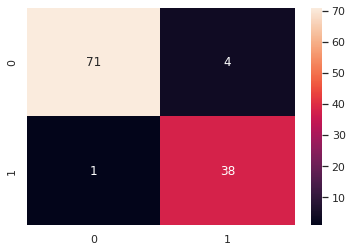

In [ ]:
print('Accuracy:',accuracy_score(y_test, y_pred))
print('Precision:',precision_score(y_test, y_pred))
print('F1:',f1_score(y_test, y_pred))
print('Recall:',recall_score(y_test, y_pred))
print('ROC AUC:',roc_auc_score(y, model.predict_proba(x)[:, 1]))
print(classification_report(y_test, y_pred))
print(sns.heatmap(confusion_matrix(y_test, y_pred), annot=True))